In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1>Research questions:</h1> 

In [2]:
def average(lst):
    return sum(lst)/len(lst)

In [12]:
with open('ex-man-export-1.json', 'r') as outfile:
    data = json.load(outfile)

NameError: name 'pd' is not defined

In [4]:
services_array = []

for i in data["focusSessions"]:
    services_array.append(len(i["services"]))

average(services_array)


2.0

In [5]:
print("Number of focus sessions: ", len(data))
print("Number of used services: ", round(average(services_array)))

Number of focus sessions:  7
Number of used services:  2


<h3>1. Does the blocking of notifications help people to be less distracted/more productive?  </h3>

<h6> Measure by perceived productivity in form of a popup-survey at the end of a focus session. </h6>

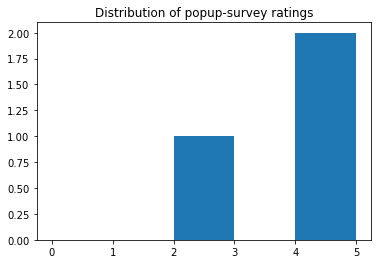

In [6]:
ratings = []
for i in data["focusSessions"]:
    
    rating = i.get("rating")
    if rating != None:
        ratings.append(rating)

averaged_rating = np.mean(ratings)

plt.hist(ratings, bins = [0,1,2,3,4,5 ], align = "mid")
plt.title("Distribution of popup-survey ratings")
plt.show()

<h6>How often the user tried to break the focusmode despite being in focus?</h6>

In [7]:
brokenFocus = []
for i in data["focusSessions"]:
    breakFocus = i.get("brokenFocus")
    if breakFocus != None:
        brokenFocus.append(len(breakFocus))

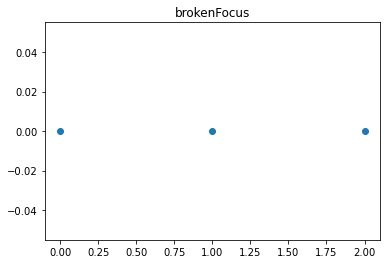

In [8]:
plt.scatter([i for i in range(len(brokenFocus))],brokenFocus)
plt.title("brokenFocus")
plt.show()

<h6>look at number of messages received/replied to in focus mode and compare to numbers outside of focus session</h6>

In [9]:
messages_received = []

for i in data["focusSessions"]:
    message_perFocus = []
    for message in i["services"]:
        print(message)
        message_perFocus.append(message["messages"])
    messages_received.append(message_perFocus)
    
messages = np.asarray(messages_received)



{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7', 'name': 'whatsapp', 'unreadCount': 6, 'autoReplied': [], 'messages': [{'timestamp': 1603301657277, 'title': 1064890078}], 'interactions': []}
{'id': '7d8bdc75-362d-452e-a4a5-d9c8336bd01c', 'name': 'teams', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': []}
{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7', 'name': 'whatsapp', 'unreadCount': 8, 'autoReplied': [], 'messages': [{'timestamp': 1603303945548, 'title': -749385461}, {'timestamp': 1603303973644, 'title': 2011401392}, {'timestamp': 1603304394696, 'title': -749385461}, {'timestamp': 1603304458380, 'title': 2011401392}, {'timestamp': 1603304636390, 'title': -749385461}, {'timestamp': 1603304825943, 'title': 2011401392}], 'interactions': []}
{'id': '7d8bdc75-362d-452e-a4a5-d9c8336bd01c', 'name': 'teams', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': []}
{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7', 'name': 'whatsapp', 'unreadCount': 6, 'autoRep

C:\Users\lutha\Anaconda3\envs\data science\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


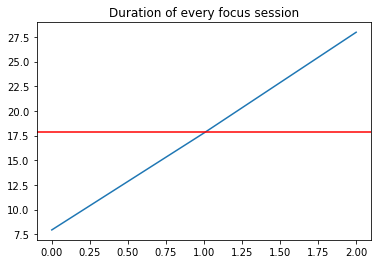

In [10]:
import datetime

focus_length = []

for i in data["focusSessions"]:
    startTime = datetime.datetime.fromtimestamp(round(i["startTime"]/1000))
    endTime = datetime.datetime.fromtimestamp(round(i["endTime"]/1000))
    
    duration = (endTime - startTime).total_seconds() / 60
    
    focus_length.append(duration)
    

plt.plot([t for t in range(len(focus_length))],focus_length)
plt.axhline(y=np.mean(focus_length), color='r', linestyle='-')
plt.title("Duration of every focus session")
plt.show()

In [11]:
plt.plot([i for i in range(len(whatsApp))],whatsApp//focus_length,label='whatsApp')
plt.plot([i for i in range(len(whatsApp))],slack//focus_length, label='slack')
plt.title("distributed messages per minuted per service over all focus sessions")
plt.legend()
plt.show()

NameError: name 'whatsApp' is not defined

In [ ]:
aggregated_messages = messages.sum(axis = 1)

plt.plot([i for i in range(len(aggregated_messages))], aggregated_messages//focus_length)
plt.title("aggregated messages per minute over all focus sessions")
plt.show()